# Hlasování - Popis

In [1]:
from datetime import datetime

In [2]:
from nastav_jupyter_notebook import nastav_pandas, nastav_google_colab

nastav_google_colab()
nastav_pandas()

In [3]:
from snemovna.Snemovna import *
from snemovna.Hlasovani import *
from snemovna.utility import *

## Tabulka Hlasování

In [4]:
h = Hlasovani()

2021-03-04:21:27:00 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:00 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [5]:
h.popis()

Počet řádků v tabulce: 8521

Sloupce s jedinou hodnotou:
  'ma_stenozaznam' má všude hodnotu 'False'
  'druh_hlasovani__ORIG' má všude hodnotu 'N'
  'druh_hlasovani' má všude hodnotu 'normální'
  'nazev_kratky' má všude hodnotu '<NA>'
  'id_organ' má všude hodnotu '172'

Nulové hodnoty: 
Sloupec 'nazev_dlouhy' obsahuje 0.04% (3 z 8521) nulových hodnot (např. NaNů).
Sloupec 'nazev_kratky' obsahuje 99.99% (8520 z 8521) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 100.00% (8521 z 8521) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 100.00% (8521 z 8521) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (8521 z 8521) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
sloupec                                                                  
id_hlasovani                             8521                     8521   
datum                                    7100                     8521   
cislo                                    1074                     8521   
cas                                       921                     8521   
nazev_dlouhy                              731                     8518   
bod                                       397                     8521   
datum__ORIG                               265                     8521   
pro                                       197                     8521   
zdrzel                                    158                     8521   
proti                                     156                     8521   
prihlaseno                                147                     8521   
schuze                                     85                     8521   
kvorum                                     80                     8521   
nehlasoval                                 51                     8521   
vysledek__ORIG                              2                     8521   
je_zmatecne                                 2                     8521   
je_zpochybneni                              2                     8521   
bod__KAT                                    2                     8521   
vysledek                                    2                     8521   
ma_stenozaznam                              1                     8521   
druh_hlasovani__ORIG                        1                     8521   
druh_hlasovani                              1                     8521   
nazev_kratky                                1                        1   
id_organ                                    1                     8521   
turn                                        0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   

                                                typ  \
sloupec                                               
id_hlasovani                                  Int64   
datum                 datetime64[ns, Europe/Prague]   
cislo                                         Int64   
cas                                          object   
nazev_dlouhy                                 string   
bod                                           Int64   
datum__ORIG                                  string   
pro                                           Int64   
zdrzel                                        Int64   
proti                                         Int64   
prihlaseno                                    Int64   
schuze                                        Int64   
kvorum                                        Int64   
nehlasoval                                    Int64   
vysledek__ORIG                               string   
je_zmatecne                                    bool   
je_zpochybneni                                 bool   
bod__KAT                                     string   
vysledek                                     string   
ma_stenozaznam                                 bool   
druh_hlasovani__ORIG                         string   
druh_hlasovani                               string   
nazev_kratky                                 string   
id_organ                                      Int64   
turn                                          Int64   
typ__ORIG                                     Int64   
typ                                          string   

                                                                                                                                                                                                                                popis  \
sloupec                                       

In [6]:
popis_sloupec(h, 'bod__KAT')

Typ: string
Počet hodnot: 8521
Počet unikátních hodnot: 2
První hodnota: normální
Poslední hodnota: normální


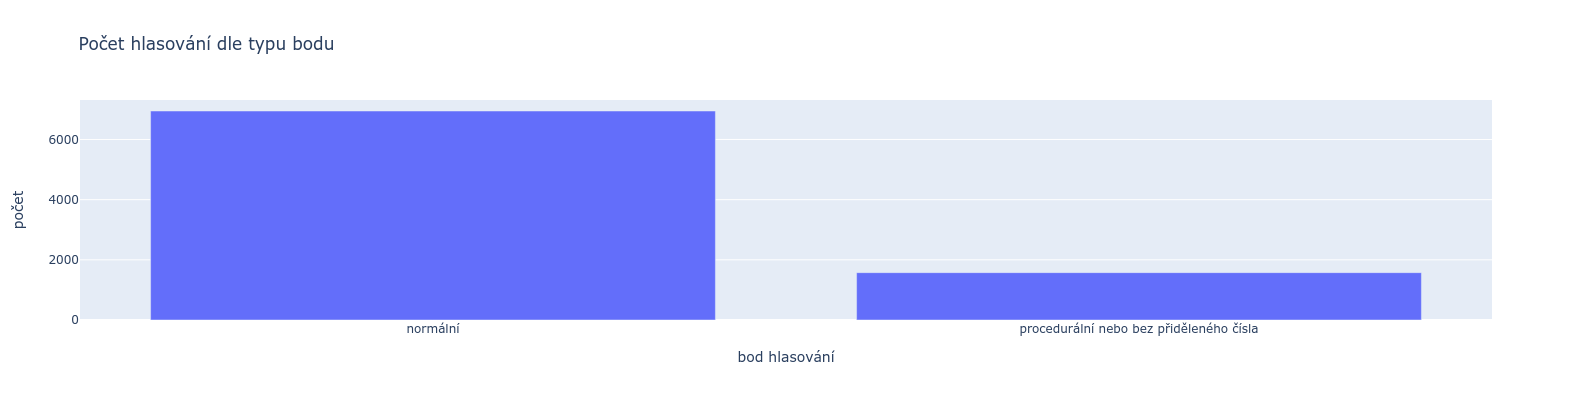

In [7]:
# Bod pořadu schůze; je-li menší než 1, pak jde o procedurální hlasování nebo o hlasování k bodům, které v době hlasování neměly přiděleno číslo.
fig = groupby_bar(h, by=['bod__KAT'], xlabel='bod hlasování', ylabel='počet', title="Počet hlasování dle typu bodu")
fig.show()

In [8]:
popis_sloupec(h, 'vysledek')

Typ: string
Počet hodnot: 8521
Počet unikátních hodnot: 2
První hodnota: přijato
Poslední hodnota: zamítnuto


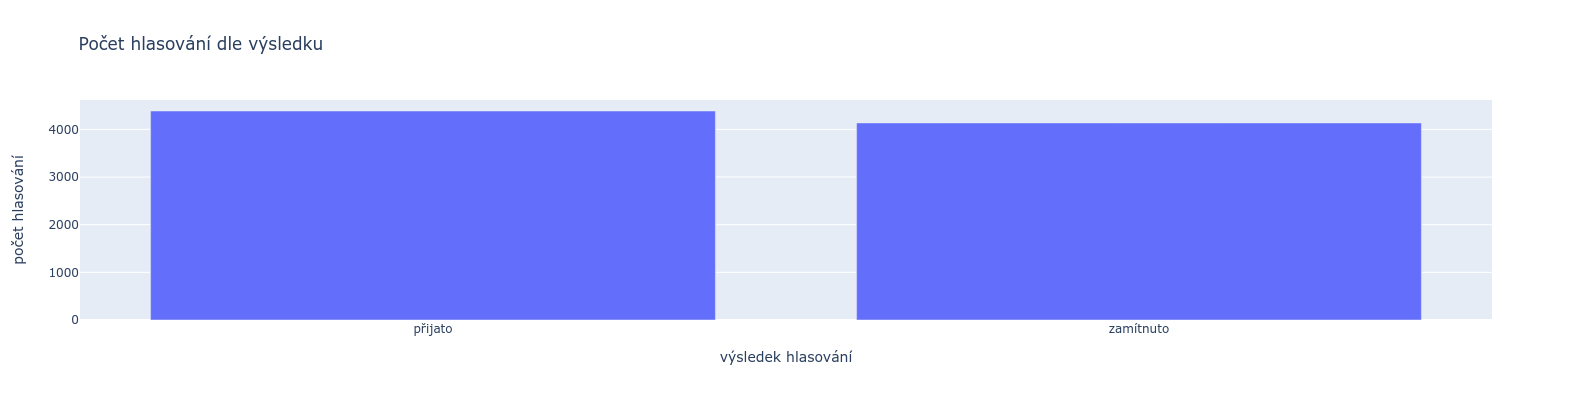

In [9]:
fig = groupby_bar(h, by=['vysledek'], xlabel='výsledek hlasování', ylabel='počet hlasování', title="Počet hlasování dle výsledku")
fig.show()

In [10]:
popis_sloupec(h, 'druh_hlasovani')

Typ: string
Počet hodnot: 8521
Počet unikátních hodnot: 1
První hodnota: normální
Poslední hodnota: normální


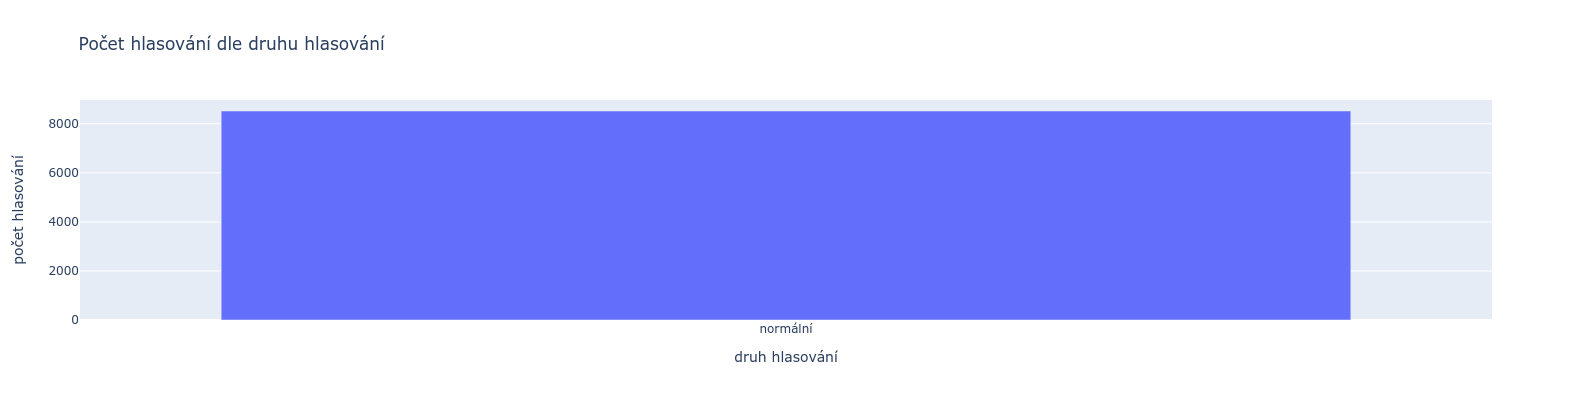

In [11]:
fig = groupby_bar(h, by=['druh_hlasovani'], xlabel='druh hlasování', ylabel='počet hlasování', title="Počet hlasování dle druhu hlasování")
fig.show()

In [12]:
popis_sloupec(h, 'datum')

Typ: datetime64[ns, Europe/Prague]
Počet hodnot: 8521
Počet unikátních hodnot: 7100
První hodnota: 2017-11-20 13:53:00+01:00
Poslední hodnota: 2021-03-03 18:42:00+01:00


Nejvíce hlasování (1120) se uskutečnilo mezi 9:00 a 9:59.
Nejméně hlasování (1) se uskutečnilo mezi 3:00 a 3:59.


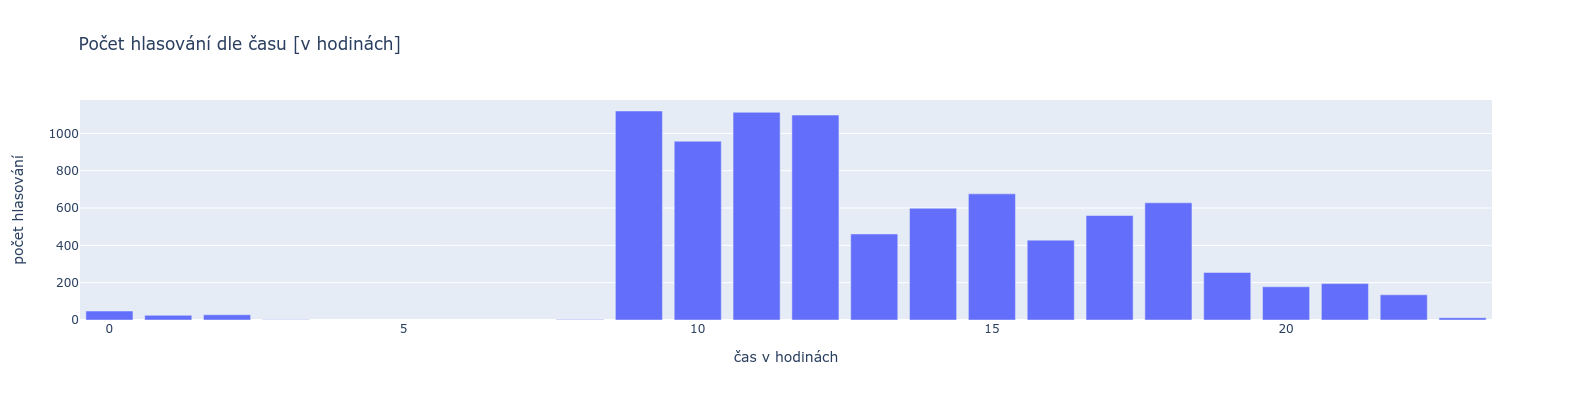

In [13]:
# hlasovani dle hodiny

df = h.groupby(h.datum.dt.hour).size()
max_idx = df.sort_values().index[-1]
min_idx = df.sort_values().index[0]
print(f"Nejvíce hlasování ({df.loc[max_idx]}) se uskutečnilo mezi {max_idx}:00 a {max_idx}:59.")
print(f"Nejméně hlasování ({df.loc[min_idx]}) se uskutečnilo mezi {min_idx}:00 a {min_idx}:59.")

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df.index,
    y=df.values,
    text=[f"{t}:00 - {t}:59" for t in df.index],
    hovertemplate="Interval: %{text}<br>Počet hlasování:%{y}<extra></extra>",
))

fig.update_layout(
    title="Počet hlasování dle času [v hodinách]",
    xaxis_title="čas v hodinách",
    yaxis_title="počet hlasování",
    width=600,
    height=400
)

fig.show()

Nejvíce hlasování (3564) se uskutečnilo během dne: středa.
Nejméně hlasování (7) se uskutečnilo během dne: pondělí.


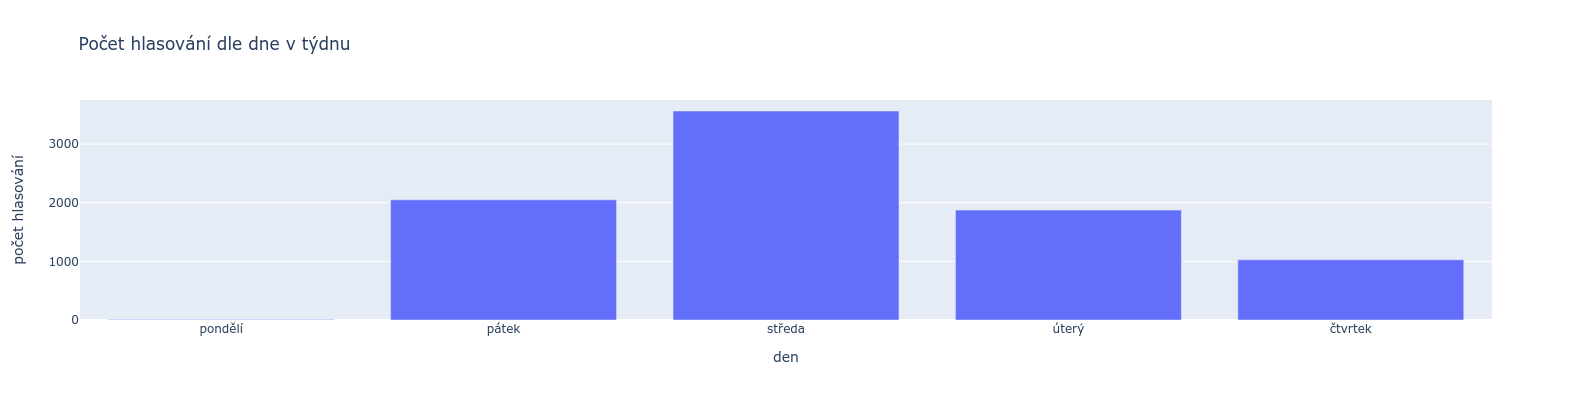

In [14]:
# hlasovani dle dne z týdne

day_dict = {'Monday':'pondělí', "Tuesday":'úterý', "Wednesday":'středa', "Thursday":'čtvrtek', "Friday":'pátek', "Saturday":'sobota', "Sunday":'neděle'}

df = h.groupby(h.datum.dt.strftime('%A').map(day_dict)).size()
max_idx = df.sort_values().index[-1]
min_idx = df.sort_values().index[0]
print(f"Nejvíce hlasování ({df.loc[max_idx]}) se uskutečnilo během dne: {max_idx}.")
print(f"Nejméně hlasování ({df.loc[min_idx]}) se uskutečnilo během dne: {min_idx}.")

fig = go.Figure()

index =  df.index
values = [df.loc[d] for d in index]
text = index
fig.add_trace(go.Bar(
    x=index,
    y=values,
    text=text,
    hovertemplate="Den: %{text}<br>Počet hlasování:%{y}<extra></extra>",
))

fig.update_layout(
    title="Počet hlasování dle dne v týdnu",
    xaxis_title="den",
    yaxis_title="počet hlasování",
    width=600,
    height=400
)

fig.show()

In [15]:
# Všechna pondělní hlasování.
# V pondělí se hlasuje velmi zřídka.

h[h.datum.dt.strftime("%A") == 'Monday']

id_hlasovani  id_organ  schuze  cislo  bod datum__ORIG       cas  pro  \
0            67018       172       1      1    3  20.11.2017  13:53:00  191   
1            67019       172       1      2    3  20.11.2017  13:53:00  194   
2            67020       172       1      3    0  20.11.2017  14:47:00   50   
3            67021       172       1      4    4  20.11.2017  15:39:00   56   
4            67022       172       1      5    4  20.11.2017  15:39:00  174   
5275         72295       172      40    338    0  02.03.2020  13:14:00    0   
7147         74167       172      62    165    0  26.10.2020  08:45:00    0   

      proti  zdrzel  ...                     datum  \
0         0       5  ... 2017-11-20 13:53:00+01:00   
1         0       4  ... 2017-11-20 13:53:00+01:00   
2       129      19  ... 2017-11-20 14:47:00+01:00   
3       100      37  ... 2017-11-20 15:39:00+01:00   
4        19       4  ... 2017-11-20 15:39:00+01:00   
5275      0       0  ... 2020-03-02 13:14:00+01:00   
7147      0       0  ... 2020-10-26 08:45:00+01:00   

                                     bod__KAT   vysledek druh_hlasovani  \
0                                    normální    přijato       normální   
1                                    normální    přijato       normální   
2     procedurální nebo bez přiděleného čísla  zamítnuto       normální   
3                                    normální  zamítnuto       normální   
4                                    normální    přijato       normální   
5275  procedurální nebo bez přiděleného čísla  zamítnuto       normální   
7147  procedurální nebo bez přiděleného čísla  zamítnuto       normální   

     je_zpochybneni je_zmatecne ma_stenozaznam  turn typ__ORIG   typ  
0             False        True          False  <NA>      <NA>  <NA>  
1             False       False          False  <NA>      <NA>  <NA>  
2             False       False          False  <NA>      <NA>  <NA>  
3             False       False          False  <NA>      <NA>  <NA>  
4             False       False          False  <NA>      <NA>  <NA>  
5275          False       False          False  <NA>      <NA>  <NA>  
7147          False        True          False  <NA>      <NA>  <NA>  

[7 rows x 27 columns]

In [16]:
def pocet_hlasovani_dle_data(df, resample_to, resample_str, resample_label):
    frame = df.set_index('datum').resample(resample_to).size()
    frame = frame.mask(frame == 0, None).dropna()

    max_idx = frame.sort_values().index[-1]
    min_idx = frame.sort_values().index[0]
    print(f"Nejvíce hlasování ({frame.loc[max_idx]}) se uskutečnilo {max_idx.strftime(resample_str)}.")
    print(f"Nejméně hlasování ({frame.loc[min_idx]}) se uskutečnilo {min_idx.strftime(resample_str)}.")

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=frame.index,
        y=frame.values,
        hovertemplate="%{x}<br>počet hlasování: %{y}<extra></extra>"
    ))
    
    fig.update_layout(
        title=f"Počet hlasování dle data ({resample_label})",
        xaxis_title=f"datum ({resample_label})",
        yaxis_title="počet hlasování",
        width=1200,
        height=500
    )

    dt_all = pd.date_range(start=frame.index[0],end=frame.index[-1])
    dt_obs = [d.strftime(resample_str) for d in frame.index]
    dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]
    # nezobrazuj data bez hlasování
    #dt_all = pd.date_range(start=df.index[0], end=df.index[-1])
    #dt_obs = [d.strftime(resample_str) for d in df.index]
    #dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]

    fig.update_xaxes(
        rangebreaks=[dict(values=dt_breaks)]
    )
    
    fig.show()

Nejvíce hlasování (387) se uskutečnilo 2019-06-05.
Nejméně hlasování (1) se uskutečnilo 2018-07-12.


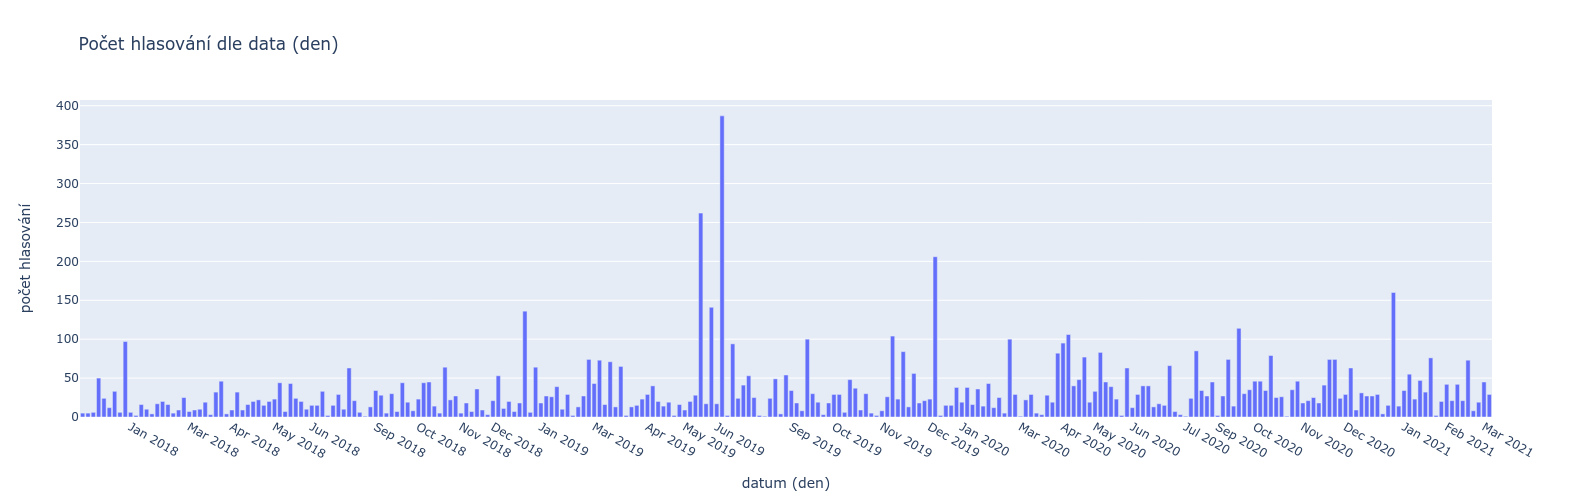

In [17]:
pocet_hlasovani_dle_data(h, "D", "%Y-%m-%d", "den")

Nejvíce hlasování (646) se uskutečnilo 2019-06.
Nejméně hlasování (13) se uskutečnilo 2018-08.


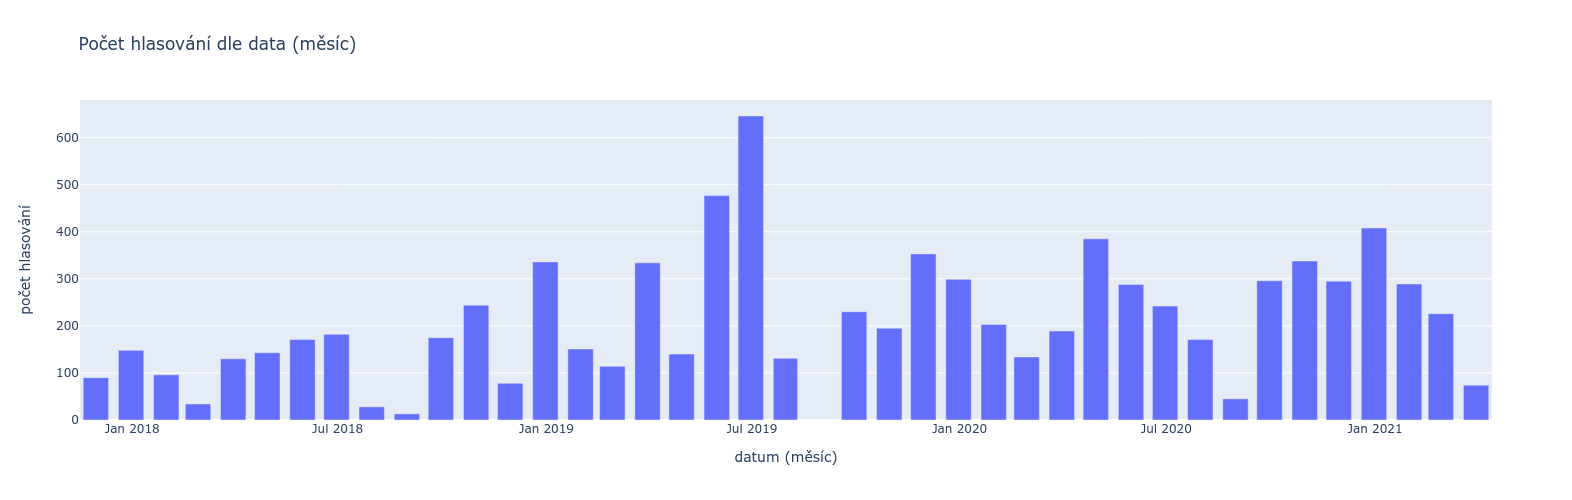

In [18]:
pocet_hlasovani_dle_data(h, "M", "%Y-%m", "měsíc")

In [19]:
# Přidej kontrolní sloupec pro součet hlasování
h['soucet_hlasovani'] =  h.pro + h.proti + h.nehlasoval + h.zdrzel

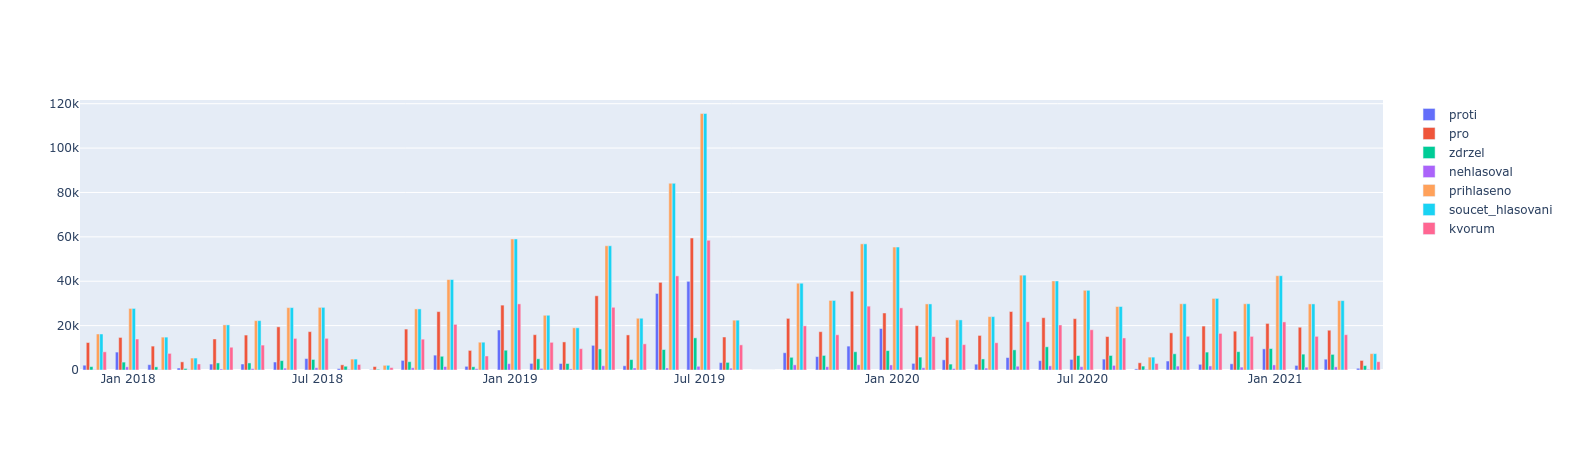

In [20]:
def resampled_bar(df, field, interval="D", date_format="%Y-%m-%d", operation='sum', name=None, type='scatter'):
    name = name if name is not None else field    
    frame = df.set_index("datum")[field].resample(interval).agg(operation)
    trace = go.Bar(x=frame.index, y=frame.values, name=name)
    return trace

interval = 'M'
fig = go.Figure()
fig.add_trace(resampled_bar(h, field="proti", interval=interval))
fig.add_trace(resampled_bar(h, field="pro", interval=interval))
fig.add_trace(resampled_bar(h, field="zdrzel", interval=interval))
fig.add_trace(resampled_bar(h, field="nehlasoval", interval=interval))
fig.add_trace(resampled_bar(h, field="prihlaseno", interval=interval))
fig.add_trace(resampled_bar(h, field="soucet_hlasovani", interval=interval))
fig.add_trace(resampled_bar(h, field="kvorum", interval=interval))

fig.show()

In [21]:
# Najdi nekonzistentní součty vysledků hlasování, tj. případy, kdy hlasoval jiný počet poslanců, než kolik jich bylo přihlášeno k hlasování.
# TODO: Ověř, že poslanci mají právo hlasovat, i když nejsou přihlášeni.

fields = ["schuze", "bod", "nazev_dlouhy", "pro", "proti", "nehlasoval", "zdrzel", "prihlaseno", "vysledek", "je_zmatecne"]
h[h.soucet_hlasovani != h.prihlaseno][fields]

schuze  bod                                       nazev_dlouhy  pro  \
1531      23    1  Návrh na vyslovení nedůvěry vládě České republiky   92   
3729      32    1  Návrh na vyslovení nedůvěry vládě České republiky   85   

      proti  nehlasoval  zdrzel  prihlaseno   vysledek  je_zmatecne  
1531     92          18       0         182  zamítnuto        False  
3729     85          18      12         182  zamítnuto        False

In [22]:
h["mira_jednomyslnosti"] = (h.pro - h.proti).abs() / (h.pro + h.proti)
h["mira_jednomyslnosti"].describe()

count    8497.000000
mean        0.652480
std         0.383335
min         0.000000
25%         0.245283
50%         0.846154
75%         1.000000
max         1.000000
Name: mira_jednomyslnosti, dtype: float64

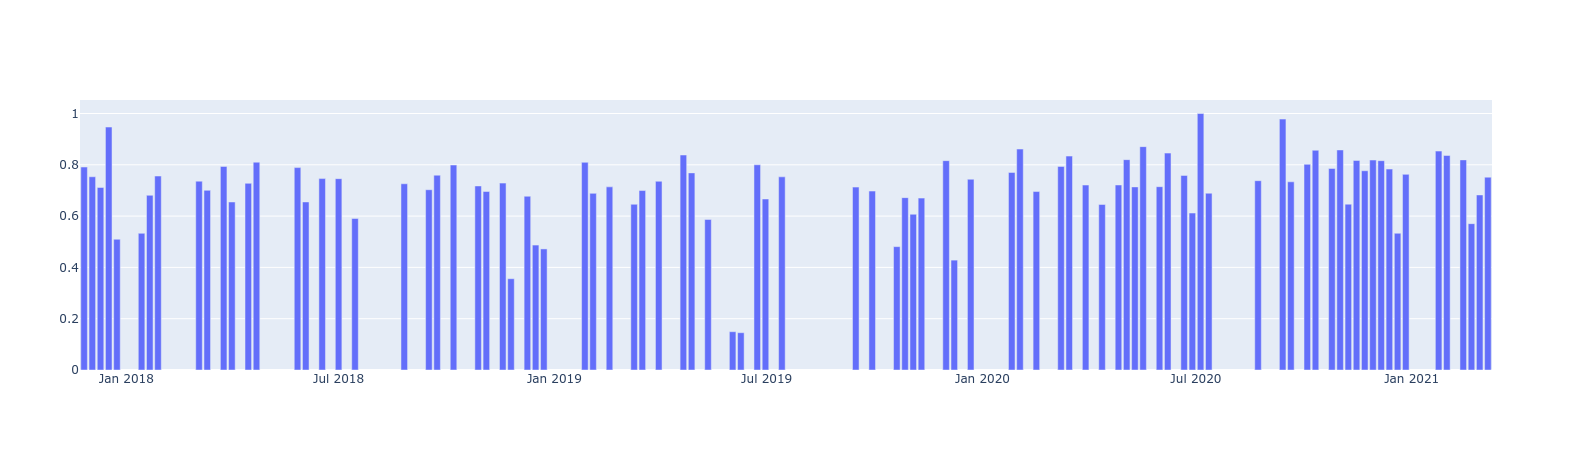

In [23]:
interval = 'W'
fig = go.Figure()
fig.add_trace(resampled_bar(h, field="mira_jednomyslnosti", interval=interval, operation="mean"))
fig.show()

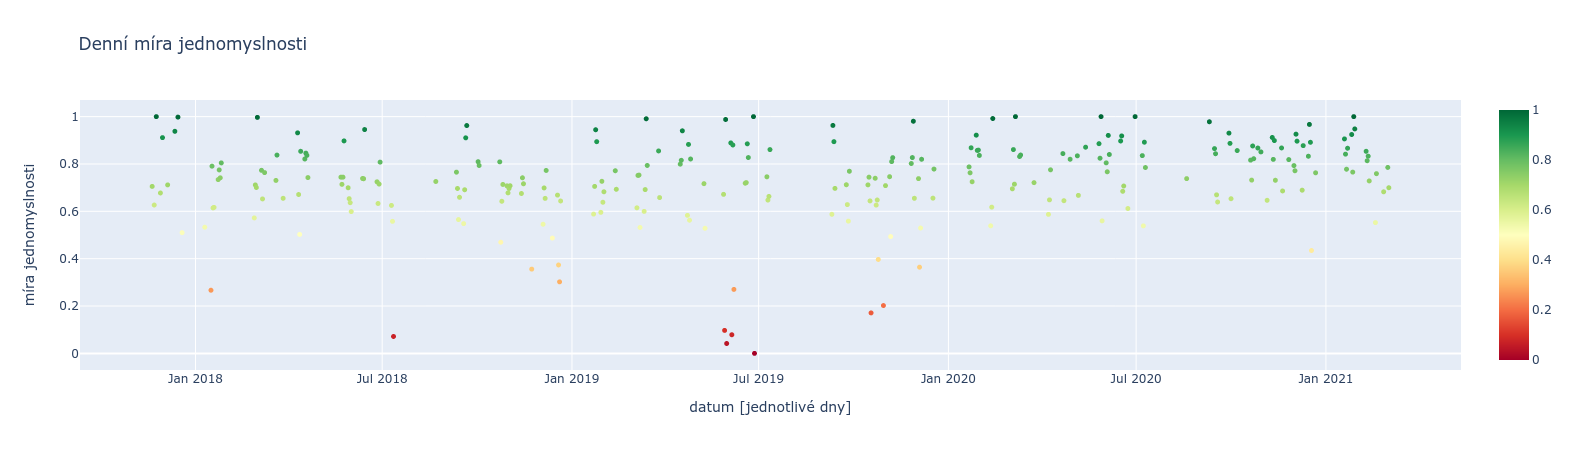

In [24]:
# denní míra jednomyslnosti

precision = 3 

def A_razeno_dle_B(x, A, B):
    df = x.groupby(A)[B].mean().sort_values(ascending=True)
    return("<br>".join(map(str, df.index.astype(str) + ': ' + df.values.round(precision).astype(str))))

days = 7
interval = f"{days}D"

df = pd.DataFrame()
df['mira_jednomyslnosti_za_den_mean'] = h.groupby(h.datum.dt.date).mira_jednomyslnosti.mean()
df['nazev_dlouhy_za_den'] = h.groupby(h.datum.dt.date)[['nazev_dlouhy', 'mira_jednomyslnosti']].apply(
    lambda x: A_razeno_dle_B(x, "nazev_dlouhy", "mira_jednomyslnosti")
) 
df.index = pd.to_datetime(df.index)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df.mira_jednomyslnosti_za_den_mean,
    text=df.nazev_dlouhy_za_den,
    name="míra jednomyslnosti za den",
    mode="markers",
     marker=dict(
        size=5,
        color=df.mira_jednomyslnosti_za_den_mean,
        colorscale='RdYlGn', # one of plotly colorscales
        showscale=True
    ),
    hovertemplate =
        '<b>%{x}</b>'+
        '<br><br><b>Průměrná míra jednomyslnosti</b>: <i>%{y:.3f}</i>'+
        '<br><br><b>Hlasování dle míry jednomyslnosti (vzestupně):</b><br>%{text}<extra></extra>',
    hoverlabel=dict(
        bgcolor='white',
        font=dict(color='black')
    )
))

fig.update_layout(title="Denní míra jednomyslnosti", xaxis=dict(title="datum [jednotlivé dny]"), yaxis=dict(title="míra jednomyslnosti"))

fig.show()

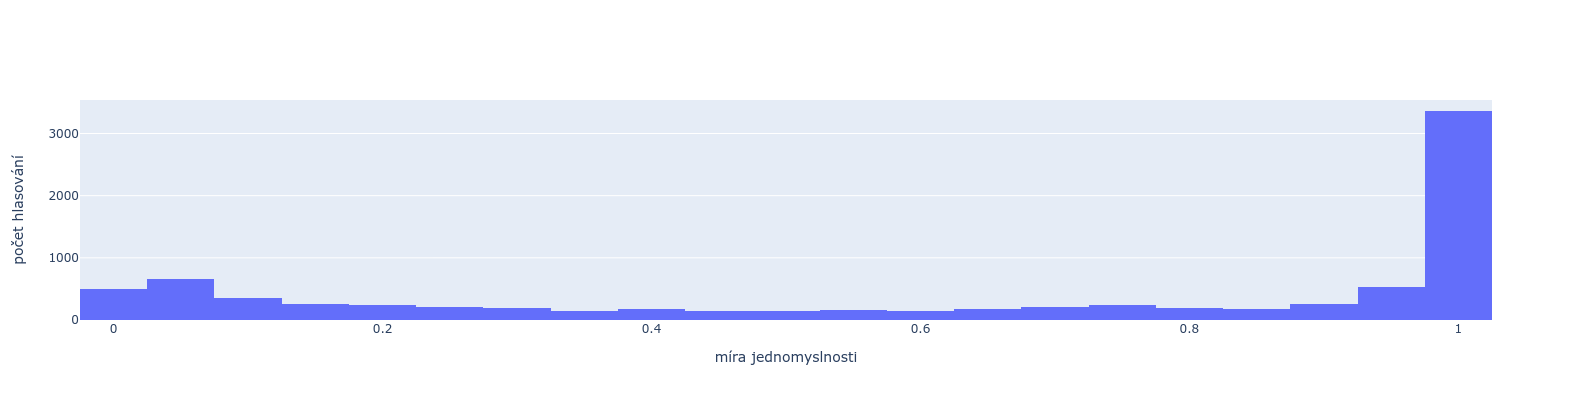

In [25]:
fig = go.Figure(go.Histogram(x=h.mira_jednomyslnosti, hovertemplate="míra jednomyslnosti: %{x}<br>počet hlasování: %{y}<extra></extra>"))
fig.update_layout(width=700, height=400, xaxis=dict(title="míra jednomyslnosti"), yaxis=dict(title="počet hlasování"))
fig.show()

In [26]:
print(f"Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): {h[h.mira_jednomyslnosti == 1].index.size}")
jednomyslna_temata = h[h.mira_jednomyslnosti == 1].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(jednomyslna_temata.head(20))

Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): 2959
nazev_dlouhy
Pořad schůze                                                              507
                                                                          124
Návrh na vyslovení souhlasu PS s prodloužením doby nouzového stavu         69
Návrh na změny ve složení orgánů Poslanecké sněmovny                       57
Návrhy PS na propůjčení nebo udělení státních vyznamenání                  45
Návrhy Poslanecké sněmovny na propůjčení nebo udělení státních vyzname     26
Novela z. - školský zákon                                                  26
Novela z. o daních z příjmů                                                23
Novela z. o kompenzačním bonusu                                            23
Novela z. - trestní řád                                                    23
Vl. n. z. kterým se mění některé zákony v oblasti daní - EU                22
Novela z. o státním rozpočtu ČR na rok 2020                   

In [27]:
print(f"Hlasování se zcela vyrovnaným pro a proti (nízká míra jednomyslnosti): {h[h.mira_jednomyslnosti == 0].index.size}")
nejednomyslna_temata = h[h.mira_jednomyslnosti == 0].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(nejednomyslna_temata.head(20))

Hlasování se zcela vyrovnaným pro a proti (nízká míra jednomyslnosti): 73
nazev_dlouhy
Novela z. o evidenci tržeb - EU                                 28
Pořad schůze                                                     7
Vl.n.z. o kompenzačním bonusu v souv. s krizovými opatřeními     5
Vl.n.z.o opatř.ke zmírnění dopadů SARS CoV-2 na nájemce byt.     2
Novela z. - horní zákon                                          2
Vl.n.z. o státním rozpočtu ČR na rok 2021                        2
Návrh na vyslovení nedůvěry vládě České republiky                2
Novela z. o rozpočtových pravidlech                              2
Vln. z. o kompenzačním bonusu pro rok 2021                       1
Novela z. o některých úpravách v oblasti evidence tržeb          1
Novela z. o pomoci v hmotné nouzi                                1
Novela z. o obcích                                               1
Novela z. o evidenci tržeb                                       1
Novela z. o důchodovém pojištění          

In [28]:
# Témata hlasování s nejvyšší mírou jednomyslnosti a jejich počty

cnt = 20
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).head(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                       
Sml. mezi ČR a Mongolskem o zpětném přebírání osob                                             2   
Výroční zpráva o činnosti a hospodaření ČTK v roce 2017                                        1   
Výroční zpráva o hospodaření Českého rozhlasu za rok 2016                                      1   
Výroční zpráva o hospodaření Českého rozhlasu za rok 2015                                      2   
Výroční zpráva o hospodaření České televize v roce 2018                                        1   
Výroční zpráva a účetní závěrka SFRB za rok 2017                                               1   
Sml.mezi ČR a vl.Rep.Kazachstán o spol.v boji proti tr.činn.                                   2   
Výroční zpráva a účetní závěrka SFRB za rok 2016                                               1   
Novela z. o Policii ČR                                                                         1   
Prot.o změně Úml.o mezinárodním civilním letectví                                              2   
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2021                                     1   
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2020                                     1   
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2019                                     1   
Smlouva o soc.zabezp.mezi ČR a Mongolskem                                                      1   
Novela z. o archivnictví a spisové službě                                                      1   
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2018                                     1   
Vl.n.z.o poskyt.st.záruky ČR na zajištění půjčky ČNB pro MMF                                   2   
Vl.n.z.o opařeních ke zmír.dopadů epid.v pracovněpr.vzt.                                       3   
Návrh Etického kodexu poslance                                                                 1   
Novela z. o distribuci pojištění a zajištění                                                   2   

                                                              prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                           
Sml. mezi ČR a Mongolskem o zpětném přebírání osob                                                1.0  
Výroční zpráva o činnosti a hospodaření ČTK v roce 2017                                           1.0  
Výroční zpráva o hospodaření Českého rozhlasu za rok 2016                                         1.0  
Výroční zpráva o hospodaření Českého rozhlasu za rok 2015                                         1.0  
Výroční zpráva o hospodaření České televize v roce 2018                                           1.0  
Výroční zpráva a účetní závěrka SFRB za rok 2017                                                  1.0  
Sml.mezi ČR a vl.Rep.Kazachstán o spol.v boji proti tr.činn.                                      1.0  
Výroční zpráva a účetní závěrka SFRB za rok 2016                                                  1.0  
Novela z. o Policii ČR                                                                            1.0  
Prot.o změně Úml.o mezinárodním civilním letectví                                                 1.0  
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2021                                        1.0  
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2020                                        1.0  
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2019                                        1.0  
Smlouva o soc.zabezp.mezi ČR a Mongolskem                                                         1.0  
Novela z. o archivnictví a spisové službě                                                         1.0  
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2018                                   

In [29]:
# Témata hlasování s nízkou mírou jednomyslnosti a jejich počty

cnt = 20
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).tail(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                                 
N.z., kterým se ruší zák. opatření Senátu č. 340/2013 Sb.                                                1   
Písemná interpelace L. Volného na A. Babiše ve věci životní situace pa                                   1   
Návrh na zřízení SK KPO                                                                                  4   
Návrh na zřízení Stálé komise pro kontrolu BIS                                                           2   
Písemná interpelace Z. Stanjury na K. Havlíčka ve věci počtu a struktu                                   1   
Novela z. o zdravotních pojišťovnách                                                                     1   
Novela z. - krizový zákon                                                                                1   
Projednání důsledků Marakéšského protokolu                                                               1   
Střednědobý výhled státního rozpočtu ČR na léta 2020 a 2021                                              2   
Střednědobý výhled státního rozpočtu ČR na léta 2022 a 2023                                              1   
Písemná interpelace M. Pekarové Adamové na A. Schillerovou ve věci pod                                   1   
Písemná interpelace J. Michálka na A. Babiše ve věci neutěšených platů                                   1   
Písemná interpelace V. Munzara na A. Schillerovou ve věci interpelace                                    1   
Písemná interpelace L. Luzara na A. Schillerovou ve věci využití super                                   1   
N.z., kterým se mění někt.zák.v oblasti zakládání obch.spol.                                             1   
Písemná interpelace V. Munzara na A. Schillerovou                                                        1   
Novela z. o evidenci tržeb - EU                                                                        863   
Písemná interpelace V. Munzara na A. Schillerovou ve věci poruš. ústav                                   1   
Písemná interpelace V. Munzara na A. Schillerovou ve věci odměňování ú                                   1   
Návrh na vyslovení nedůvěry vládě České republiky                                                        3   

                                                                        prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                                     
N.z., kterým se ruší zák. opatření Senátu č. 340/2013 Sb.                                              0.250000  
Písemná interpelace L. Volného na A. Babiše ve věci životní situace pa                                 0.246753  
Návrh na zřízení SK KPO                                                                                0.244359  
Návrh na zřízení Stálé komise pro kontrolu BIS                                                         0.241776  
Písemná interpelace Z. Stanjury na K. Havlíčka ve věci počtu a struktu                                 0.239437  
Novela z. o zdravotních pojišťovnách                                                                   0.218750  
Novela z. - krizový zákon                                                                              0.194805  
Projednání důsledků Marakéšského protokolu                                                             0.186441  
Střednědobý výhled státního rozpočtu ČR na léta 2020 a 2021                                            0.140402  
Střednědobý výhled státního rozpočtu ČR na léta 2022 a 2023                                            0.136842  
Písemná interpelace M. Pekarové Adamové na A. Schillerovou ve věci pod                                 0.132530  
Písemná interpelace J. Michálka na A. Babiše ve věci neutěšených platů                                 0.123288  
Písemná interpelace V. Munzara na A. Schillerovou ve vě

## Tabulka stenozáznamů hlasování
Pozor: Zkoumáme ji pro sněmovnu 2013, protože data sněmovny 2017 vazbu na stenozáznam (zatím) neobsahují.

In [30]:
h2 = Hlasovani(volebni_obdobi=2013)

2021-03-04:21:27:05 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2013ps.zip'.


In [31]:
h2.popis()

Počet řádků v tabulce: 8709

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '171'

Nulové hodnoty: 
Sloupec 'nazev_dlouhy' obsahuje 0.10% (9 z 8709) nulových hodnot (např. NaNů).
Sloupec 'nazev_kratky' obsahuje 99.98% (8707 z 8709) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 1.24% (108 z 8709) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 1.24% (108 z 8709) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 1.24% (108 z 8709) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
sloupec                                                                  
id_hlasovani                             8709                     8709   
datum                                    7387                     8709   
nazev_dlouhy                              985                     8700   
cas                                       749                     8709   
cislo                                     568                     8709   
turn                                      410                     8601   
bod                                       305                     8709   
datum__ORIG                               284                     8709   
pro                                       194                     8709   
proti                                     162                     8709   
zdrzel                                    156                     8709   
prihlaseno                                150                     8709   
kvorum                                     85                     8709   
schuze                                     61                     8709   
nehlasoval                                 46                     8709   
typ__ORIG                                   2                     8601   
ma_stenozaznam                              2                     8709   
druh_hlasovani                              2                     8709   
je_zmatecne                                 2                     8709   
je_zpochybneni                              2                     8709   
druh_hlasovani__ORIG                        2                     8709   
vysledek                                    2                     8709   
bod__KAT                                    2                     8709   
nazev_kratky                                2                        2   
vysledek__ORIG                              2                     8709   
typ                                         2                     8601   
id_organ                                    1                     8709   

                                                typ  \
sloupec                                               
id_hlasovani                                  Int64   
datum                 datetime64[ns, Europe/Prague]   
nazev_dlouhy                                 string   
cas                                          object   
cislo                                         Int64   
turn                                          Int64   
bod                                           Int64   
datum__ORIG                                  string   
pro                                           Int64   
proti                                         Int64   
zdrzel                                        Int64   
prihlaseno                                    Int64   
kvorum                                        Int64   
schuze                                        Int64   
nehlasoval                                    Int64   
typ__ORIG                                     Int64   
ma_stenozaznam                                 bool   
druh_hlasovani                               string   
je_zmatecne                                    bool   
je_zpochybneni                                 bool   
druh_hlasovani__ORIG                         string   
vysledek                                     string   
bod__KAT                                     string   
nazev_kratky                                 string   
vysledek__ORIG                               string   
typ                                          string   
id_organ                                      Int64   

                                                                                                                                                                                                                                popis  \
sloupec                                       

In [32]:
popis_tabulku(h2.tbl['hlasovani_vazba_stenozaznam'])

Počet řádků v tabulce: 8606

Každý sloupec obsahuje alespoň dvě různé hodnoty.

Nulové hodnoty: 
Tabulka neobsahuje žádné nulové hodnoty [NaNy atp.]



počet unikátních hodnot  počet nenulových hodnot     typ
sloupec                                                               
id_hlasovani                     8606                     8606   Int64
turn                              410                     8606   Int64
typ__ORIG                           2                     8606   Int64
typ                                 2                     8606  string

In [33]:
# Jak se stenozáznam promítá do tabulky hlasování?

h2.popis_sloupec("ma_stenozaznam")
print()

print("Dle tabulky vazba_stenozáznam:")
h2.tbl['hlasovani_vazba_stenozaznam'].set_index('id_hlasovani').typ.value_counts()

Typ: bool
Počet hodnot: 8709
Počet unikátních hodnot: 2
První hodnota: True
Poslední hodnota: True

Dle tabulky vazba_stenozáznam:


hlasovani zmíněno v stenozáznamu         8523
hlasování není zmíněno v stenozáznamu      83
Name: typ, dtype: Int64

## Tabulka Zpochybnění hlasování

In [34]:
zp = ZpochybneniHlasovani(volebni_obdobi=2017)
zp.head()

2021-03-04:21:27:08 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-04:21:27:10 WARNING  [Snemovna.py:133] While merging 'zpochybneni' with 'hlasovani': Dropping ['turn__hlasovani'] because of abundance.


id_hlasovani  turn  mode  id_h2  id_h3                      mode__KAT  \
0         69165     7     0  69166  69167   žádost o opakování hlasování   
1         69170     7     0  69171  69172   žádost o opakování hlasování   
2         69213    38     1   <NA>   <NA>  pouze sdělení pro stenozáznam   
3         69231    44     1   <NA>   <NA>  pouze sdělení pro stenozáznam   
4         69318   140     1   <NA>   <NA>  pouze sdělení pro stenozáznam   

   id_organ  schuze  cislo  bod  ... nazev_kratky                     datum  \
0       172      27     13    0  ...         <NA> 2019-03-05 14:58:00+01:00   
1       172      27     18    0  ...         <NA> 2019-03-05 15:04:00+01:00   
2       172      27     61   98  ...         <NA> 2019-03-06 09:55:00+01:00   
3       172      27     79   99  ...         <NA> 2019-03-06 10:58:00+01:00   
4       172      27    166  103  ...         <NA> 2019-03-08 11:03:00+01:00   

                                  bod__KAT   vysledek  druh_hlasovani  \
0  procedurální nebo bez přiděleného čísla  zamítnuto        normální   
1  procedurální nebo bez přiděleného čísla  zamítnuto        normální   
2                                 normální  zamítnuto        normální   
3                                 normální    přijato        normální   
4                                 normální  zamítnuto        normální   

   je_zpochybneni  je_zmatecne  ma_stenozaznam typ__ORIG   typ  
0            True        False           False      <NA>  <NA>  
1            True        False           False      <NA>  <NA>  
2            True        False           False      <NA>  <NA>  
3            True        False           False      <NA>  <NA>  
4            True        False           False      <NA>  <NA>  

[5 rows x 31 columns]

In [35]:
zp.popis()

Počet řádků v tabulce: 211

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '172'
  'druh_hlasovani__ORIG' má všude hodnotu 'N'
  'druh_hlasovani' má všude hodnotu 'normální'
  'je_zpochybneni' má všude hodnotu 'True'
  'je_zmatecne' má všude hodnotu 'False'
  'ma_stenozaznam' má všude hodnotu 'False'

Nulové hodnoty: 
Sloupec 'id_h2' obsahuje 64.93% (137 z 211) nulových hodnot (např. NaNů).
Sloupec 'id_h3' obsahuje 65.40% (138 z 211) nulových hodnot (např. NaNů).
Sloupec 'nazev_kratky' obsahuje 100.00% (211 z 211) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 100.00% (211 z 211) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (211 z 211) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
sloupec                                                                  
id_hlasovani                              200                      211   
datum                                     199                      211   
cas                                       171                      211   
cislo                                     146                      211   
turn                                      144                      211   
datum__ORIG                               116                      211   
pro                                       108                      211   
nazev_dlouhy                              106                      211   
bod                                        89                      211   
proti                                      84                      211   
prihlaseno                                 78                      211   
zdrzel                                     73                      211   
id_h2                                      70                       74   
id_h3                                      67                       73   
kvorum                                     49                      211   
schuze                                     39                      211   
nehlasoval                                 31                      211   
mode__KAT                                   3                      211   
mode                                        3                      211   
vysledek__ORIG                              2                      211   
bod__KAT                                    2                      211   
vysledek                                    2                      211   
id_organ                                    1                      211   
druh_hlasovani__ORIG                        1                      211   
druh_hlasovani                              1                      211   
je_zpochybneni                              1                      211   
je_zmatecne                                 1                      211   
ma_stenozaznam                              1                      211   
nazev_kratky                                0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   

                                                typ  \
sloupec                                               
id_hlasovani                                  Int64   
datum                 datetime64[ns, Europe/Prague]   
cas                                          object   
cislo                                         Int64   
turn                                          Int64   
datum__ORIG                                  string   
pro                                           Int64   
nazev_dlouhy                                 string   
bod                                           Int64   
proti                                         Int64   
prihlaseno                                    Int64   
zdrzel                                        Int64   
id_h2                                         Int64   
id_h3                                         Int64   
kvorum                                        Int64   
schuze                                        Int64   
nehlasoval                                    Int64   
mode__KAT                                    string   
mode                                          Int64   
vysledek__ORIG                               string   
bod__KAT                                     string   
vysledek                                     string   
id_organ                                      Int64   
druh_hlasovani__ORIG                         string   
druh_hlasovani                               string   
je_zpochybneni                                 bool   
je_zmatecne                            

In [36]:
# 0 - žádost o opakování hlasování - v tomto případě se o této žádosti neprodleně hlasuje a teprve je-li tato žádost přijata, je hlasování opakováno;
# 1 - pouze sdělení pro stenozáznam, není požadováno opakování hlasování.

zp.df["mode__KAT"].value_counts()

pouze sdělení pro stenozáznam    137
žádost o opakování hlasování      72
2                                  2
Name: mode__KAT, dtype: Int64

In [37]:
# Jsou zpochybněná hlasování uvedená v tabulce hlasovani? 

h_ids = set(h.id_hlasovani)
zp_all_ids = set(zp.id_hlasovani)
zp_opak_ids = set(zp[zp.mode__KAT == "žádost o opakování hlasování"].id_hlasovani)
zp_bez_opak_ids = set(zp[zp.mode__KAT == "pouze sdělení pro stenozáznam"].id_hlasovani)
print(f"Všechna hlasování: {len(h_ids)}")
print(f"Všechna zpochybněná hlasování = {len(h_ids.intersection(zp_all_ids))}")
#print(f"Zpochybněná hlasování, která nejsou uvedená v tabulce hlasování [může být zavádějící]: {len(zp_all_ids - h_ids)}")
print(f"Všechna zpochybněná hlasování s opakováním hlasování = {len(h_ids.intersection(zp_opak_ids))}")
print(f"Všechna zpochybněná hlasování bez opakování hlasování = {len(h_ids.intersection(zp_bez_opak_ids))}")

Všechna hlasování: 8521
Všechna zpochybněná hlasování = 200
Všechna zpochybněná hlasování s opakováním hlasování = 69
Všechna zpochybněná hlasování bez opakování hlasování = 130


In [38]:
fields = ['nazev_dlouhy', 'schuze', 'cislo', 'bod', 'datum', 'cas', 'pro', 'proti', 'zdrzel', 'nehlasoval', 'prihlaseno', 'kvorum', 'vysledek']
print("Příklad zpochybněných hlasování:")
h[h.id_hlasovani.isin(zp_all_ids)][fields].head()

Příklad zpochybněných hlasování:


nazev_dlouhy  schuze  cislo  bod  \
6                         Návrh na potvrzení předsedy MIV       1      7    7   
139  Návrh na změny ve složení orgánů Poslanecké sněmovny       4     38   10   
200             Vl.n.z. o státním rozpočtu ČR na rok 2018       4     99    4   
219             Vl.n.z. o státním rozpočtu ČR na rok 2018       4    118    4   
289            N.z., kterým se ruší zákon o prodejní době       6     44    9   

                        datum       cas  pro  proti  zdrzel  nehlasoval  \
6   2017-11-22 12:57:00+01:00  12:57:00  115     66       9           4   
139 2017-12-15 09:15:00+01:00  09:15:00  173      0       1           1   
200 2017-12-19 19:08:00+01:00  19:08:00  103     79      13           4   
219 2017-12-19 19:31:00+01:00  19:31:00   81     78      27          13   
289 2018-01-23 17:58:00+01:00  17:58:00  102     57       3           3   

     prihlaseno  kvorum   vysledek  
6           194      98    přijato  
139         175      88    přijato  
200         199     100    přijato  
219         199     100  zamítnuto  
289         165      83    přijato

In [39]:
print("Nejčastěji zpochybňovaná hlasování [prvních 10 sestupně, seskupeno dle názvu]:")
cnt = 10
h[h.id_hlasovani.isin(zp_all_ids)].groupby("nazev_dlouhy").size().sort_values(ascending=False).head(cnt)

Nejčastěji zpochybňovaná hlasování [prvních 10 sestupně, seskupeno dle názvu]:


nazev_dlouhy
Pořad schůze                                                          30
Novela z. o evidenci tržeb - EU                                       11
Vl.n.z. o státním rozpočtu ČR na rok 2021                              7
Vl. n. z. kterým se mění některé zákony v oblasti daní - EU            5
Vl.n.z., kterým se mění některé zákony v oblasti daní - EU             4
Návrh na vyslovení souhlasu PS s prodloužením doby nouzového stavu     4
Novela ústav. z. - Ústava ČR                                           4
                                                                       4
Vl.n.z.o výrobcích s ukončenou životností - EU                         3
Novela z. - zákoník práce                                              3
dtype: int64

## Tabulka Zpochybnění hlasování poslancem

In [40]:
zpp = ZpochybneniPoslancem(volebni_obdobi=2017)

2021-03-04:21:27:11 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:11 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [41]:
zpp.popis()

Počet řádků v tabulce: 214

Sloupce s jedinou hodnotou:
  'je_zmatecne' má všude hodnotu 'False'
  'ma_stenozaznam' má všude hodnotu 'False'
  'je_zpochybneni' má všude hodnotu 'True'
  'druh_hlasovani' má všude hodnotu 'normální'
  'id_organ' má všude hodnotu '172'
  'druh_hlasovani__ORIG' má všude hodnotu 'N'

Nulové hodnoty: 
Sloupec 'nazev_kratky' obsahuje 100.00% (214 z 214) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 100.00% (214 z 214) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 100.00% (214 z 214) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (214 z 214) nulových hodnot (např. NaNů).
Sloupec 'zmena' obsahuje 91.59% (196 z 214) nulových hodnot (např. NaNů).
Sloupec 'umrti' obsahuje 100.00% (214 z 214) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
sloupec                                                                  
id_hlasovani                              199                      214   
datum                                     198                      214   
cas                                       170                      214   
cislo                                     145                      214   
datum__ORIG                               116                      214   
pro                                       107                      214   
nazev_dlouhy                              105                      214   
prijmeni                                  104                      214   
id_osoba                                  104                      214   
narozeni                                  104                      214   
bod                                        89                      214   
proti                                      83                      214   
prihlaseno                                 77                      214   
zdrzel                                     73                      214   
jmeno                                      52                      214   
kvorum                                     49                      214   
schuze                                     39                      214   
nehlasoval                                 31                      214   
pred                                       20                      214   
za                                          8                      214   
zmena                                       4                       18   
pohlavi__ORIG                               3                      214   
mode                                        3                      214   
bod__KAT                                    2                      214   
vysledek                                    2                      214   
vysledek__ORIG                              2                      214   
pohlavi                                     2                      214   
je_zmatecne                                 1                      214   
ma_stenozaznam                              1                      214   
je_zpochybneni                              1                      214   
druh_hlasovani                              1                      214   
id_organ                                    1                      214   
druh_hlasovani__ORIG                        1                      214   
turn                                        0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   
nazev_kratky                                0                        0   
umrti                                       0                        0   

                                                typ  \
sloupec                                               
id_hlasovani                                  Int64   
datum                 datetime64[ns, Europe/Prague]   
cas                                          object   
cislo                                         Int64   
datum__ORIG                                  string   
pro                                           Int64   
nazev_dlouhy                                 string   
prijmeni                                     string   
id_osoba                                      Int64   
narozeni              datetime64[ns, Europe/Prague]   
bod                                           Int64   
proti                                         Int64   
prihlaseno                                    Int64   
zdrzel                                        Int64   
jmeno                                        string   
kvorum                                        Int64   
schuze                                        Int64   
nehlasoval      

In [42]:
zm = ZmatecneHlasovani()
zm.head()

2021-03-04:21:27:14 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:15 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


id_hlasovani  id_organ  schuze  cislo  bod datum__ORIG       cas  pro  \
0         67018       172       1      1    3  20.11.2017  13:53:00  191   
1         67055       172       2     22    4  28.11.2017  17:12:00   38   
2         67061       172       2     28    6  28.11.2017  17:44:00    2   
3         67085       172       2     52   18  30.11.2017  09:09:00   60   
4         67096       172       2     63   18  30.11.2017  09:21:00   15   

   proti  zdrzel  ...                     datum  bod__KAT   vysledek  \
0      0       5  ... 2017-11-20 13:53:00+01:00  normální    přijato   
1      0     134  ... 2017-11-28 17:12:00+01:00  normální  zamítnuto   
2      0     182  ... 2017-11-28 17:44:00+01:00  normální  zamítnuto   
3      1     107  ... 2017-11-30 09:09:00+01:00  normální  zamítnuto   
4      2     153  ... 2017-11-30 09:21:00+01:00  normální  zamítnuto   

  druh_hlasovani je_zpochybneni je_zmatecne ma_stenozaznam  turn typ__ORIG  \
0       normální          False        True          False  <NA>      <NA>   
1       normální          False        True          False  <NA>      <NA>   
2       normální          False        True          False  <NA>      <NA>   
3       normální          False        True          False  <NA>      <NA>   
4       normální          False        True          False  <NA>      <NA>   

    typ  
0  <NA>  
1  <NA>  
2  <NA>  
3  <NA>  
4  <NA>  

[5 rows x 27 columns]

In [43]:
h2013 = Hlasovani(volebni_obdobi=2013)
h2017 = Hlasovani(volebni_obdobi=2017)

2021-03-04:21:27:18 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2013ps.zip'.
2021-03-04:21:27:21 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [44]:
# Vizualizace id_hlasovani pro různé tabulky

# Z dat lze usoudit, že pro současnou sněmovnu (2017) neexistuje zmatečné hlasování, které by nebylo uvedeno v tabulce hlasování,
# protože všechny záznamy 'zmatecne_bez_hlasovani_ids' mají ids menší než je začátek ids hlasovani současné směnovny.

# Z dat lze usoudit, že hlasování nemůže být současně zmatečné a zpochybněné poslancem.

# Divné: Pro současnou sněmovnu existují ids zpochybnění hlasování, která jsou nižší než ids v tabulce hlasování.

id_hlasovani_threshold = h.id_hlasovani.min()

h2017_ids = sorted(list(set(h2017.id_hlasovani)))
h2013_ids = sorted(list(set(h2013.id_hlasovani)))
                    
zp_ids = sorted(list(set(zp.id_hlasovani)))
zpp_ids = sorted(list(set(zpp.id_hlasovani)))
zm_ids = sorted(list(set(zm.id_hlasovani)))
                
zpochybneni_bez_poslance_ids = list(set(zp_ids) - set(zpp_ids))
zpochybneni_a_zmatecne_ids = list(set(zp_ids).intersection(zm_ids))
zmatecne_bez_hlasovani_ids = list(set(zm_ids) - set(h2017_ids))

marker=dict(size=1, line=dict(width=0))
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=h2017_ids,
    y = [3]*len(h2017_ids),
    name = "hlasovani_df (současná sněmovna)",
    hovertemplate="hlasovani_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=h2013_ids,
    y = [2.8]*len(h2017_ids),
    name = "hlasovani_df (sněmovna 2013)",
    hovertemplate="hlasovani_df (sněmovna 2013)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zp_ids, 
    y = [2]*len(zp_ids),
    name="zpochybneni_hlasovani_df (současná sněmovna)",
    hovertemplate="zpochybneni_hlasovani_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zpochybneni_bez_poslance_ids,
    y = [1.5]*len(zpochybneni_bez_poslance_ids),
    name="zpochybnění bez asociovaného poslance (současná sněmovna)",
    hovertemplate="zpochybnění bez uvedeného poslance (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zpp_ids,
    y = [1]*len(zpp_ids),
    name="zpochybneni_poslancem_df (současná sněmovna)",
    hovertemplate="zpochybneni_poslancem_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))


fig.add_trace(go.Scatter(
    x=zm_ids,
    y = [0]*len(zm_ids),
    name="zmatecne_hlasovani_df (všechny sněmovny)",
    hovertemplate="zmatecne_hlasovani_df (všechny sněmovny)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zmatecne_bez_hlasovani_ids,
    y = [-0.5]*len(zmatecne_bez_hlasovani_ids),
    name="zmatečné, ale není v tabulce hlasování",
    hovertemplate="zmatečné, ale není v tabulce hlasování<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=[id_hlasovani_threshold]*2,
    y=[-1, 3.5],
    name="hranice záznamů v tabulce hlasování",
    hovertemplate="hranice záznamů v tabulce hlasování<extra></extra>",
    mode="lines",
    line=dict(width=1, dash='dash')
))

fig.update_layout(title="Číselné hodnoty identifikátorů hlasování v různých tabulkách",  yaxis=dict(title='Tabulka', showticklabels=False), xaxis=dict(title='Identifikátor hlasování (jako integer)'))
#fig.show() Disable output since this is very intensive for the editor
True

True

In [45]:
# Více osob může zpochybnit jedno hlasování, tj. 'id_hlasování' není pro každý řádek unikátní.
zpp_dle_osoba = zpp.groupby(["id_hlasovani"]).size().sort_values(ascending=False).reset_index(name='pocet_osob').set_index('id_hlasovani')
print("Hlasování zpochybněná více lidmi")
zpp_dle_osoba[zpp_dle_osoba.pocet_osob > 1]


Hlasování zpochybněná více lidmi


pocet_osob
id_hlasovani            
69585                  3
70584                  2
69534                  2
70494                  2
70621                  2
68053                  2
70664                  2
72643                  2
72009                  2
74870                  2
74811                  2
74382                  2
71063                  2
73086                  2

In [46]:
idx = zpp_dle_osoba[zpp_dle_osoba.pocet_osob > 1].index
res = pd.DataFrame()
if len(idx) > 0:
    print("Příklad hlasování zpochybněného více poslanci:")
    res = zpp[zpp.id_hlasovani == idx[0]]
res

Příklad hlasování zpochybněného více poslanci:


id_hlasovani  id_osoba  mode  id_organ  schuze  cislo  bod datum__ORIG  \
568         69585      6165     2       172      28     99    1  23.04.2019   
573         69585      6418     2       172      28     99    1  23.04.2019   
593         69585      6254     1       172      28     99    1  23.04.2019   

          cas  pro  ...   typ          pred   prijmeni  jmeno    za  \
568  17:26:00  114  ...  <NA>          Mgr.  Vondráček  Radek         
573  17:26:00  114  ...  <NA>  Ing. et Ing.   Skopeček    Jan         
593  17:26:00  114  ...  <NA>   prof. MUDr.   Adámková   Věra  CSc.   

                     narozeni pohlavi__ORIG zmena umrti pohlavi  
568 1973-12-30 00:00:00+01:00             M   NaT   NaT     muž  
573 1980-10-21 00:00:00+01:00             M   NaT   NaT     muž  
593 1954-10-19 00:00:00+01:00             Ž   NaT   NaT    žena  

[3 rows x 38 columns]

## Tabulka zmatečného hlasování

In [47]:
zm = ZmatecneHlasovani()
zm.head()

2021-03-04:21:27:24 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:24 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


id_hlasovani  id_organ  schuze  cislo  bod datum__ORIG       cas  pro  \
0         67018       172       1      1    3  20.11.2017  13:53:00  191   
1         67055       172       2     22    4  28.11.2017  17:12:00   38   
2         67061       172       2     28    6  28.11.2017  17:44:00    2   
3         67085       172       2     52   18  30.11.2017  09:09:00   60   
4         67096       172       2     63   18  30.11.2017  09:21:00   15   

   proti  zdrzel  ...                     datum  bod__KAT   vysledek  \
0      0       5  ... 2017-11-20 13:53:00+01:00  normální    přijato   
1      0     134  ... 2017-11-28 17:12:00+01:00  normální  zamítnuto   
2      0     182  ... 2017-11-28 17:44:00+01:00  normální  zamítnuto   
3      1     107  ... 2017-11-30 09:09:00+01:00  normální  zamítnuto   
4      2     153  ... 2017-11-30 09:21:00+01:00  normální  zamítnuto   

  druh_hlasovani je_zpochybneni je_zmatecne ma_stenozaznam  turn typ__ORIG  \
0       normální          False        True          False  <NA>      <NA>   
1       normální          False        True          False  <NA>      <NA>   
2       normální          False        True          False  <NA>      <NA>   
3       normální          False        True          False  <NA>      <NA>   
4       normální          False        True          False  <NA>      <NA>   

    typ  
0  <NA>  
1  <NA>  
2  <NA>  
3  <NA>  
4  <NA>  

[5 rows x 27 columns]

In [48]:
zm.popis()

Počet řádků v tabulce: 109

Sloupce s jedinou hodnotou:
  'ma_stenozaznam' má všude hodnotu 'False'
  'je_zmatecne' má všude hodnotu 'True'
  'je_zpochybneni' má všude hodnotu 'False'
  'druh_hlasovani__ORIG' má všude hodnotu 'N'
  'druh_hlasovani' má všude hodnotu 'normální'
  'id_organ' má všude hodnotu '172'

Nulové hodnoty: 
Sloupec 'nazev_kratky' obsahuje 100.00% (109 z 109) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 100.00% (109 z 109) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 100.00% (109 z 109) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (109 z 109) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
sloupec                                                                  
id_hlasovani                              108                      109   
datum                                     108                      109   
cas                                       101                      109   
cislo                                      88                      109   
zdrzel                                     81                      109   
datum__ORIG                                75                      109   
nazev_dlouhy                               69                      109   
prihlaseno                                 67                      109   
pro                                        60                      109   
bod                                        58                      109   
kvorum                                     51                      109   
schuze                                     36                      109   
proti                                      29                      109   
nehlasoval                                 17                      109   
vysledek__ORIG                              2                      109   
bod__KAT                                    2                      109   
vysledek                                    2                      109   
ma_stenozaznam                              1                      109   
je_zmatecne                                 1                      109   
je_zpochybneni                              1                      109   
druh_hlasovani__ORIG                        1                      109   
druh_hlasovani                              1                      109   
id_organ                                    1                      109   
nazev_kratky                                0                        0   
turn                                        0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   

                                                typ  \
sloupec                                               
id_hlasovani                                  Int64   
datum                 datetime64[ns, Europe/Prague]   
cas                                          object   
cislo                                         Int64   
zdrzel                                        Int64   
datum__ORIG                                  string   
nazev_dlouhy                                 string   
prihlaseno                                    Int64   
pro                                           Int64   
bod                                           Int64   
kvorum                                        Int64   
schuze                                        Int64   
proti                                         Int64   
nehlasoval                                    Int64   
vysledek__ORIG                               string   
bod__KAT                                     string   
vysledek                                     string   
ma_stenozaznam                                 bool   
je_zmatecne                                    bool   
je_zpochybneni                                 bool   
druh_hlasovani__ORIG                         string   
druh_hlasovani                               string   
id_organ                                      Int64   
nazev_kratky                                 string   
turn                                          Int64   
typ__ORIG                                     Int64   
typ                                          string   

                                                                                                                                                                                                                                popis  \
sloupec                                       

## Tabulka omluv poslanců z hlasování

In [49]:
om = Omluvy()
om.head()

2021-03-04:21:27:27 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:28 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-04:21:27:32 WARNING  [Snemovna.py:133] While merging 'funkce' with 'typ_funkce': Dropping ['id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'typ_organu_obecny__typ_funkce', 'typ_id_typ_organ__typ_funkce', 'nazev_typ_organ_en__typ_funkce'] because of abundance.
2021-03-04:21:27:33 WARNING  [utility.py:166] Skipped 1 values while formatting 'do_o' to datetime. Using format '%Y-%m-%d %H'. Example of skipped rows: ['0205-06-09 00'].
2021-03-04:21:27:35 WARNING  [Snemovna.py:133] While merging 'omluvy' with 'poslanci': Dropping ['id_organ__poslanci'] because of abundance.


id_organ  id_poslanec   den__ORIG od__ORIG do__ORIG        od  \
21483       172         1554  20.11.2017     <NA>     <NA>       NaN   
21484       172         1533  22.11.2017     <NA>     <NA>       NaN   
21485       172         1586  22.11.2017    14:30    23:59  14:30:00   
21486       172         1716  22.11.2017    17:00    23:59  17:00:00   
21487       172         1536  24.11.2017    08:30    10:00  08:30:00   

             do                       den  id_osoba  id_kraj  ...  zkratka  \
21483       NaN 2017-11-20 00:00:00+01:00      5261      581  ...     PSP8   
21484       NaN 2017-11-22 00:00:00+01:00      6002      590  ...     PSP8   
21485  23:59:00 2017-11-22 00:00:00+01:00      6200      584  ...     PSP8   
21486  23:59:00 2017-11-22 00:00:00+01:00      6161      591  ...     PSP8   
21487  10:00:00 2017-11-24 00:00:00+01:00      6138      588  ...     PSP8   

            nazev_organ_cz       nazev_organ_en                  od_organ  \
21483  Poslanecká sněmovna  Chamber of Deputies 2017-10-21 00:00:00+02:00   
21484  Poslanecká sněmovna  Chamber of Deputies 2017-10-21 00:00:00+02:00   
21485  Poslanecká sněmovna  Chamber of Deputies 2017-10-21 00:00:00+02:00   
21486  Poslanecká sněmovna  Chamber of Deputies 2017-10-21 00:00:00+02:00   
21487  Poslanecká sněmovna  Chamber of Deputies 2017-10-21 00:00:00+02:00   

      do_organ cl_organ_base typ_id_typ_organ nazev_typ_organ_cz  \
21483      NaT             0               12          Parlament   
21484      NaT             0               12          Parlament   
21485      NaT             0               12          Parlament   
21486      NaT             0               12          Parlament   
21487      NaT             0               12          Parlament   

      nazev_typ_organ_en typ_organu_obecny  
21483         Parliament              <NA>  
21484         Parliament              <NA>  
21485         Parliament              <NA>  
21486         Parliament              <NA>  
21487         Parliament              <NA>  

[5 rows x 57 columns]

In [50]:
h = Hlasovani()
pocet_dni_hlasovani = h.datum.dt.date.nunique()
pocet_dni_hlasovani

2021-03-04:21:27:36 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-04:21:27:36 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


265

In [51]:
cnt = 20
omluvy_na_poslance = om.groupby([om.den.dt.date, "id_poslanec", "jmeno", "prijmeni"]).size().sort_values(ascending=False).reset_index(name='pocet_omluv_za_den')
omluvy_na_poslance_a_den =  omluvy_na_poslance.groupby(["id_poslanec", "jmeno", "prijmeni"]).size().sort_values(ascending=False)
omluvy_na_poslance_a_den.tail(cnt)

id_poslanec  jmeno      prijmeni         
1732         Petr       Bendl                61
1528         Lukáš      Bartoň               59
1730         Iva        Kalátová             59
1540         Stanislav  Berkovec             59
1619         Roman      Kubíček              59
1563         Milan      Feranec              58
1682         Bohuslav   Sobotka              56
1608         Vladimír   Koníček              56
1629         Tomáš      Martínek             54
1733         Ondřej     Babka                54
1554         Jiří       Dolejš               53
1667         Martin     Půta                 52
1660         Jaroslava  Pokorná Jermanová    52
1580         Jiří       Hlavatý              52
1734         Irena      Blažková             45
1735         Jaroslav   Vymazal              37
1736         Jaroslava  Puntová              12
1737         Jan        Jakob                12
1738         Miroslav   Samaš                 9
1739         Pavel      Šindelář              

In [52]:
cnt = 20
omluvy_na_poslance_a_den.head(cnt)

id_poslanec  jmeno      prijmeni        
1524         Andrej     Babiš               212
1683         Antonín    Staněk              191
1533         Jiří       Běhounek            187
1680         Karel      Schwarzenberg       187
1623         Jana       Levová              184
1603         Jiří       Kobza               161
1541         Jan        Birke               159
1692         Julius     Špičák              157
1578         Jan        Hamáček             156
1564         Dominik    Feri                151
1585         Tereza     Hyťhová             151
1716         Rostislav  Vyzula              147
1652         Markéta    Pekarová Adamová    147
1579         Tomáš      Hanzel              147
1539         Ondřej     Benešík             146
1724         Petr       Pávek               144
1574         Pavla      Golasowská          142
1701         Helena     Válková             141
1558         Jaroslav   Dvořák              141
1543         Jiří       Bláha               138

In [53]:
omluvy_na_poslance_a_den.describe()

count    218.000000
mean      94.339450
std       30.905749
min        1.000000
25%       76.000000
50%       90.000000
75%      111.000000
max      212.000000
dtype: float64

## Check for Nans

## Analyze Categorical Data

In [54]:
pocet_schuzi = h.schuze.max()

print(f"Počet schůzí: {pocet_schuzi}.")

Počet schůzí: 88.


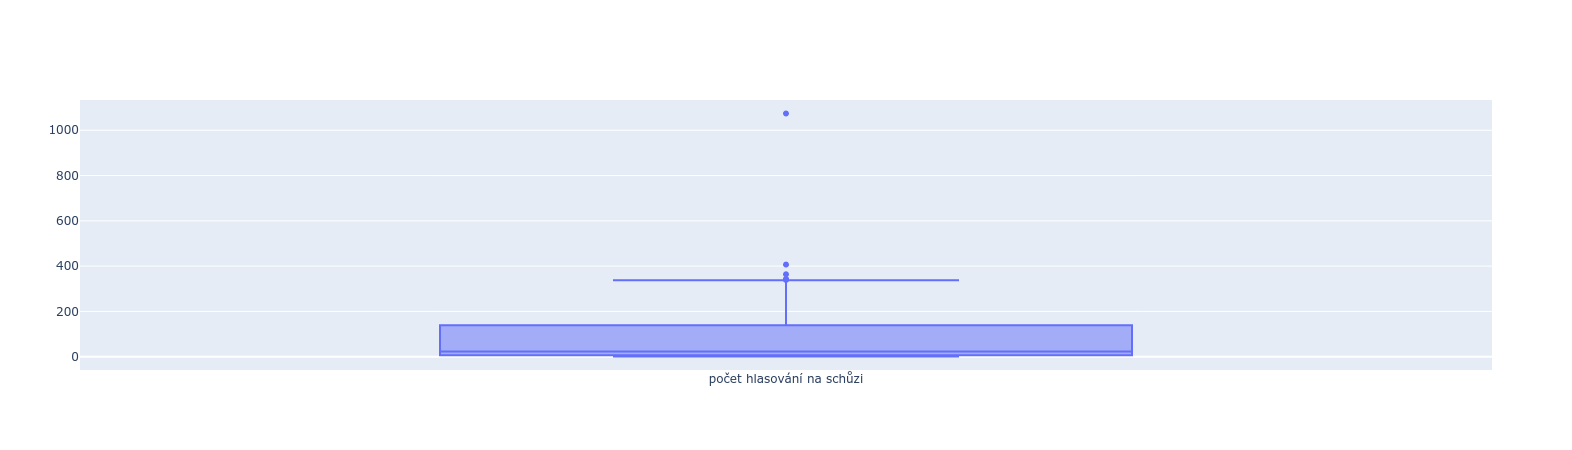

In [55]:
go.Figure(go.Box(y=h.groupby("schuze").size(), name="počet hlasování na schůzi"))

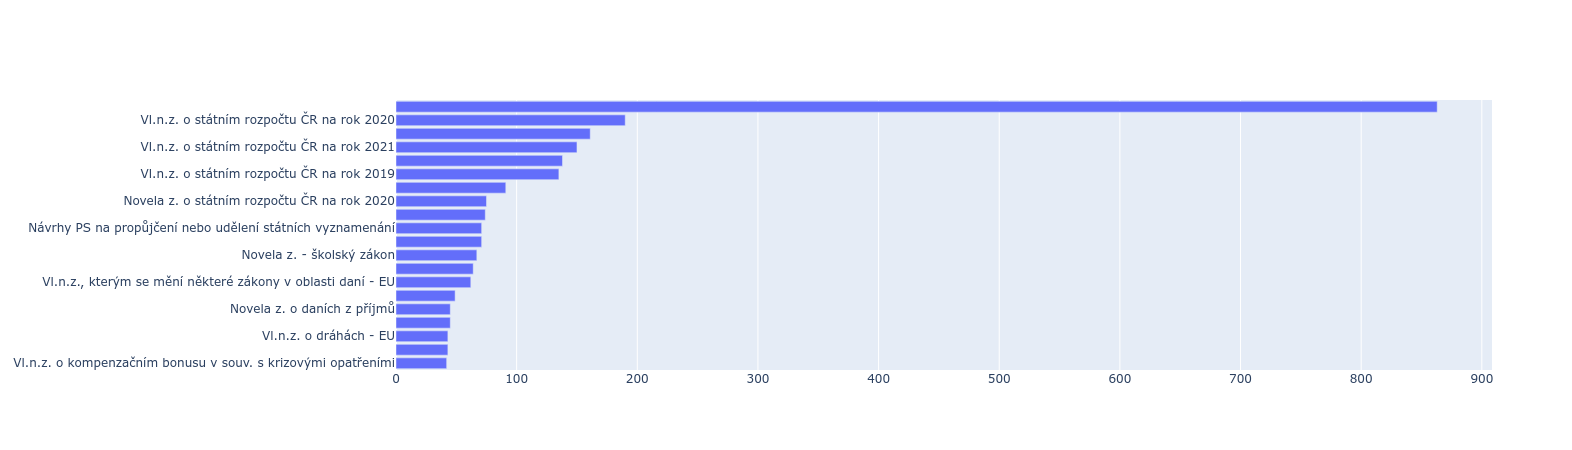

In [56]:
hlasovani_dle_bodu_srs = h[h.bod >= 1].groupby("nazev_dlouhy").size().sort_values(ascending=False)
cnt = 20
y=hlasovani_dle_bodu_srs[:cnt].index[::-1]
x=hlasovani_dle_bodu_srs[:cnt].values[::-1]
go.Figure(go.Bar(x=x, y=y, orientation='h'))

In [57]:
def pocet_dni_na_schuzi(id_schuze):
    return len(h[h.schuze == id_schuze].groupby('datum').size().index)

cnt = 10
schuze_dle_poctu_hlasovani = h.groupby("schuze").count().id_hlasovani.sort_values(ascending=False)
schuze_dle_poctu_hlasovani_str = [f"Během {schuze}. schůze ({pocet_dni_na_schuzi(schuze)} dní) proběhlo {pocet_hlasovani} hlasování, průměrně {pocet_hlasovani/pocet_dni_na_schuzi(schuze):.0f} hlasování za den." 
    for (schuze, pocet_hlasovani) in schuze_dle_poctu_hlasovani.iteritems()]
x = "\n".join(schuze_dle_poctu_hlasovani_str[:cnt])

print(f"Prvních {cnt} schůzí s největším počtem hlasování:\n{x}")

Prvních 10 schůzí s největším počtem hlasování:
Během 30. schůze (687 dní) proběhlo 1074 hlasování, průměrně 2 hlasování za den.
Během 39. schůze (328 dní) proběhlo 407 hlasování, průměrně 1 hlasování za den.
Během 35. schůze (319 dní) proběhlo 364 hlasování, průměrně 1 hlasování za den.
Během 79. schůze (295 dní) proběhlo 343 hlasování, průměrně 1 hlasování za den.
Během 62. schůze (299 dní) proběhlo 340 hlasování, průměrně 1 hlasování za den.
Během 72. schůze (301 dní) proběhlo 340 hlasování, průměrně 1 hlasování za den.
Během 40. schůze (288 dní) proběhlo 338 hlasování, průměrně 1 hlasování za den.
Během 27. schůze (295 dní) proběhlo 334 hlasování, průměrně 1 hlasování za den.
Během 24. schůze (251 dní) proběhlo 329 hlasování, průměrně 1 hlasování za den.
Během 58. schůze (272 dní) proběhlo 314 hlasování, průměrně 1 hlasování za den.


In [58]:
id_schuze_s_nejvetsim_poctem_hlasovani = schuze_dle_poctu_hlasovani.index[0]
#id_schuze_s_nejvetsim_poctem_hlasovani.groupby('datum')
#pocet_dni = len(hlasovani_df[hlasovani_df.schuze == id_schuze_s_nejvetsim_poctem_hlasovani].groupby('datum').count().index)
                
print(f"Největší počet hlasování ({schuze_dle_poctu_hlasovani.iloc[0]}) proběhl během {id_schuze_s_nejvetsim_poctem_hlasovani}. schůze ({pocet_dni_na_schuzi(id_schuze_s_nejvetsim_poctem_hlasovani)} dní).")
d = h[(h.schuze == id_schuze_s_nejvetsim_poctem_hlasovani) & (h.bod >= 1)].groupby("nazev_dlouhy").size().sort_values(ascending=False)

d

Největší počet hlasování (1074) proběhl během 30. schůze (687 dní).


nazev_dlouhy
Novela z. o evidenci tržeb - EU                                           834
Návrhy PS na propůjčení nebo udělení státních vyznamenání                  51
Novela z. o místních poplatcích                                            18
Novela z. o léčivech                                                       12
Vyjádření nesouhlasu s postupem ruské Dumy, která chce legitimizovat v     11
Novela z. o investičních pobídkách                                         11
Vl.n.z. v souvislosti s podporou výkonu práv akcionářů - EU                 8
Fin.ztráty v souv.s předběžnou zpr.Evropské komise                          6
Novela z. o podpoře sportu                                                  6
Novela z. o zemědělství                                                     5
Novela z. o zpravodajských službách ČR                                      4
Novela z. o podmín. obchod. s povol. na emise skl. plynů - EU               4
Novela z. o soudnictví ve věcech mládeže - EU      

In [59]:
x = 100 * len(h[h.bod < 1]) / len(h)

print(f"{x:.2f}% z hlasování bylo procedurální nebo nemělo přiděleno číslo.")

18.47% z hlasování bylo procedurální nebo nemělo přiděleno číslo.


In [60]:
h[h.prihlaseno < h.kvorum]

id_hlasovani  id_organ  schuze  cislo  bod datum__ORIG       cas  pro  \
1526         68545       172      22      8    1  15.11.2018  10:23:00    0   
3603         70623       172      30    951   10  18.06.2019  18:19:00    0   
4151         71171       172      35     61  317  17.10.2019  10:35:00    0   
4977         71997       172      40     40  209  22.01.2020  11:08:00    0   
5275         72295       172      40    338    0  02.03.2020  13:14:00    0   
7147         74167       172      62    165    0  26.10.2020  08:45:00    0   

      proti  zdrzel  ...                     datum  \
1526      0       0  ... 2018-11-15 10:23:00+01:00   
3603      1      88  ... 2019-06-18 18:19:00+02:00   
4151      0       0  ... 2019-10-17 10:35:00+02:00   
4977      0       0  ... 2020-01-22 11:08:00+01:00   
5275      0       0  ... 2020-03-02 13:14:00+01:00   
7147      0       0  ... 2020-10-26 08:45:00+01:00   

                                     bod__KAT   vysledek druh_hlasovani  \
1526                                 normální  zamítnuto       normální   
3603                                 normální  zamítnuto       normální   
4151                                 normální  zamítnuto       normální   
4977                                 normální  zamítnuto       normální   
5275  procedurální nebo bez přiděleného čísla  zamítnuto       normální   
7147  procedurální nebo bez přiděleného čísla  zamítnuto       normální   

     je_zpochybneni je_zmatecne ma_stenozaznam  turn typ__ORIG   typ  
1526          False       False          False  <NA>      <NA>  <NA>  
3603          False       False          False  <NA>      <NA>  <NA>  
4151          False        True          False  <NA>      <NA>  <NA>  
4977          False        True          False  <NA>      <NA>  <NA>  
5275          False       False          False  <NA>      <NA>  <NA>  
7147          False        True          False  <NA>      <NA>  <NA>  

[6 rows x 27 columns]

In [61]:
h.groupby('druh_hlasovani').size()

druh_hlasovani
normální    8521
dtype: int64

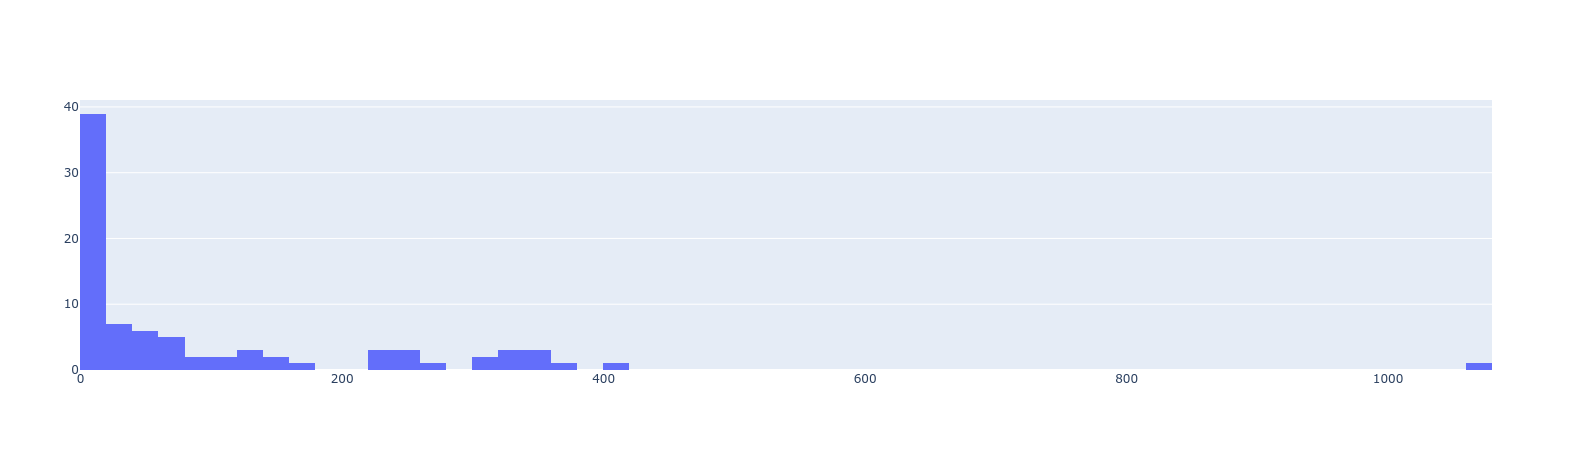

In [62]:
# Počet hlasování na schůzi

s = h.groupby('schuze').size().sort_values()
y = s.index
x = s

go.Figure(go.Histogram(x=x, nbinsx=60))

Na schůzích [10, 21, 71] se nehlasovalo.


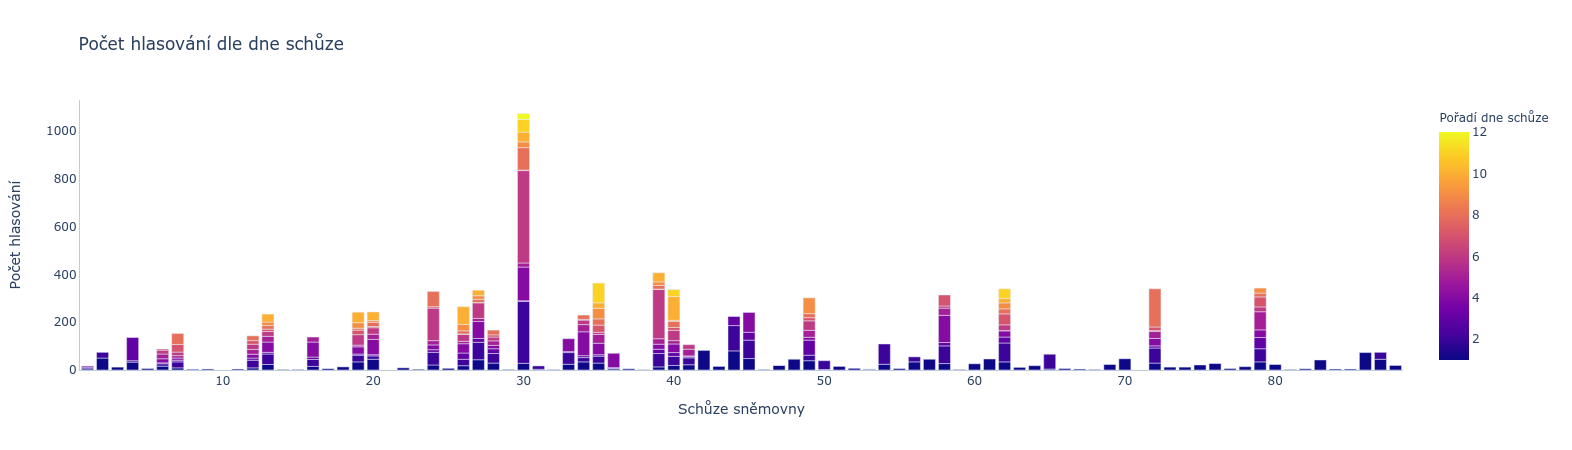

In [63]:
import plotly.express as px
h["pocet_dni_na_schuzi"] = h.groupby(["schuze"]).datum.transform('nunique')

h['den'] = h.datum.dt.date
h["den_schuze"] = h.groupby(["schuze", h.datum.dt.date]).ngroup()
h["den_schuze_min"] = h.groupby(["schuze"]).den_schuze.transform(min)
h["den_schuze_rank"] = (h["den_schuze"] - h["den_schuze_min"] + 1)

x1 = h.groupby(["schuze", 'den', "den_schuze_rank"]).size()
z1 = x1.reset_index(name="pocet_hlasovani")

print(f"Na schůzích {sorted(set(range(z1.schuze.max() + 1)) - set(z1.schuze.unique()) - set([0]))} se nehlasovalo.")
fig = px.bar(z1, x="schuze", y="pocet_hlasovani",
            color="den_schuze_rank",
            hover_data=['schuze', 'den_schuze_rank', 'pocet_hlasovani', 'den'],
            labels={'schuze':'Schůze', 'den': 'Datum', 'den_schuze_rank': 'Pořadí dne schůze', 'pocet_hlasovani': 'Počet hlasování'},
            title="Počet hlasování dle dne schůze")

layout = go.Layout(
    title="Počet hlasování dle dne schůze",    
    plot_bgcolor="#FFFFFF",
    #hovermode="x",
    #hoverdistance=100, # Distance to show hover label of data point
    #spikedistance=1000, # Distance to show spike
    xaxis=dict(
        title="Schůze sněmovny",
        linecolor="#BCCCDC",
        #type='category'
    ),
    yaxis=dict(
        title="Počet hlasování",
        linecolor="#BCCCDC",
        showspikes=True,
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",
    )
)

fig.update_layout(layout)

In [64]:
print(f"Poslední běh notebooku: {datetime.now().strftime('%d.%m.%Y %H:%M:%S')}.")

Poslední běh notebooku: 04.03.2021 21:27:42.
